# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1
70 67 113 113


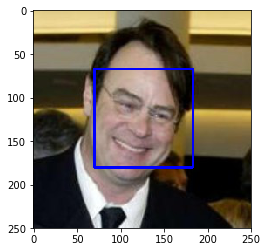

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    print(x, y, w, h)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- Percnetage of human faces in human files = 98%
- Percentage of human faces in dog files = 17%

In [4]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_count = 0
dog_face_count = 0
for human_image, dog_image in tqdm(zip(human_files_short, dog_files_short)):
    is_human_face = face_detector(human_image)
    if(is_human_face):
        human_face_count += 1
    is_human_face = face_detector(dog_image)
    if(not is_human_face):
        dog_face_count += 1
print('Percentage of detected human face in human_files:', (human_face_count/len(human_files_short)) * 100, '%')
human_face_in_dog_files_perentage = (1 - (dog_face_count/len(dog_files_short))) * 100
print('Percentage of detected human face in dog files:', human_face_in_dog_files_perentage, '%')

100it [00:33,  3.03it/s]

Percentage of detected human face in human_files: 98.0 %
Percentage of detected human face in dog files: 17.000000000000004 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 60661113.59it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    VGG16.eval() # Not mandatory for VGG but needed for other models
    img = Image.open(img_path)
    
    transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), 
                                                         (0.229, 0.224, 0.225))])

    img = transform(img).unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    output = VGG16.forward(img)
    
    output = output.cpu()
    
    predicted_index = torch.argmax(output).item()
    
    return predicted_index # predicted class index

print('dog files-', dog_files[2000])
print(VGG16_predict(dog_files[2000]))

dog files- /data/dog_images/train/091.Japanese_chin/Japanese_chin_06226.jpg
152


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
dog_files_test = np.array(glob("/data/dog_images/test/*/*"))

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    prediction_index = VGG16_predict(img_path)
    
    return True if prediction_index in list(range(151, 269)) else False # true/false

print('dog files-', dog_files_test[600])
print(dog_detector(dog_files_test[600]))

dog files- /data/dog_images/test/117.Pekingese/Pekingese_07568.jpg
True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Percentage of detected dog face in dog file = 100.0 %
- Percentage of detected dog face in human files = 0.0 %


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm
human_face_count = 0
dog_face_count = 0
for human_image, dog_image in tqdm(zip(human_files_short, dog_files_short)):
    is_dog_face = dog_detector(dog_image)
    if(is_dog_face):
        dog_face_count += 1
    is_dog_face = dog_detector(human_image)
    if(not is_dog_face):
        human_face_count += 1
print('Percentage of detected dog face in dog files:', (dog_face_count/len(dog_files_short)) * 100, '%')
dog_face_in_human_files_perentage = (1 - (human_face_count/len(human_files_short))) * 100
print('Percentage of detected dog face in human files:', dog_face_in_human_files_perentage, '%')

100it [00:07, 15.06it/s]

Percentage of detected dog face in dog files: 100.0 %
Percentage of detected dog face in human files: 0.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
import torch
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

valid_dir = os.path.join(data_dir, 'valid/')

In [12]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 20
loaders_scratch = {}

test_transforms = transforms.Compose([transforms.Resize(128),
                                      transforms.CenterCrop(64),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), 
                                                           (0.229, 0.224, 0.225))])
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(64),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), 
                                                            (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
validation_data = datasets.ImageFolder(valid_dir, transform = test_transforms)

classes = train_data.classes
print('Classes:', len(classes))
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num of valid images: ', len(validation_data))

loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
loaders_scratch['valid'] = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)

Classes: 133
Num training images:  6680
Num test images:  836
Num of valid images:  835


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#function to un-normalize and display an image
def imshow(img):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    img = (img * std[:, None, None]) + mean[:, None, None]  # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # convert from Tensor image

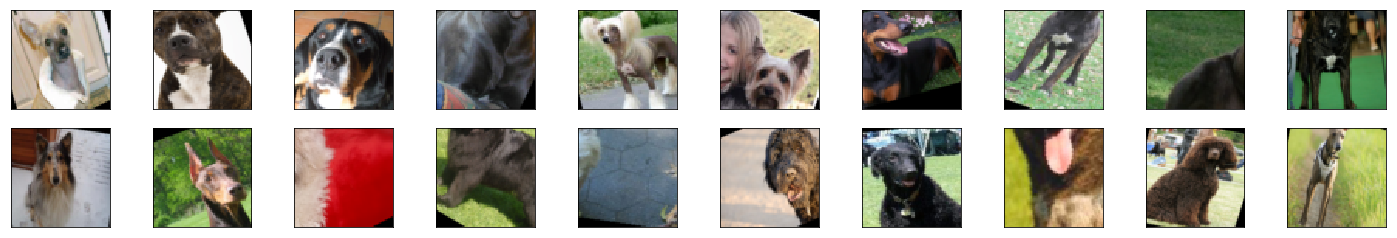

In [14]:
dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
# images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
#     ax.set_title(classes[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
- My code uses transforms that resizes to 128, then crops to 64, converting into tensors and normalizing it to standard values. I chose 64x64 as input size of images because pretrained models take in input size of 224 and they are quite complicated. So in my opinion 64x64 would be a good input size to use as we are trying to keep the image smaller so the training process can be completed quickly.

- Yes I decided to augment datasets. Since we are building the Neural Net from scratch, we need to provide randomness to training datasets to decrease trainng loss and train better. I used horizontal flipping and random rotation of 30 degrees to images.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  #Input Image Size 64x64x3
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) #Input Image Size 32x32x16
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) #Input Image 16x16x32
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) #Input Image Size 8x8x64
        
        self.fc1 = nn.Linear(4 * 4 * 128, 500) #Input Image Size 4x4x128
        
        self.fc2 = nn.Linear(500, 133)
        
        self.dropout = nn.Dropout(0.3)
        
        self.max_pool = nn.MaxPool2d(2, 2)
    def forward(self, x):
        ## Define forward behavior
        x = self.max_pool(F.relu(self.conv1(x)))
        
        x = self.max_pool(F.relu(self.conv2(x)))
        
        x = self.max_pool(F.relu(self.conv3(x)))
        
        x = self.max_pool(F.relu(self.conv4(x)))
                
        x = x.view(-1, 4 * 4 * 128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [16]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  The steps took to decide convoluitonal layers were as follows:
- I started with an image size of 64 x 64 and depth as 3 because of RGB channel.
- While adding convolutional layers my idea was to keep increasing depth and reduce the image size before reaching the fully connected layer.
- At first, I used 3 convolutional layers by doubling depth in each layer upto 64. But due to less accuracy, I decided to increase a layer with ending depth as 128, to get better feature extraction.
- I decided to go with kernel size of 3 and padding and stride of value 1 as I wanted to get the same image size as the image size before entering a convolutional layer.
- Using a maxpool of kernel and stride of 2, which will reduce the image size by a factor of 2.

The steps took to decide fully connected layer were as follows:
- At the end of convolutional layers we recieve an image with size 4x4 and depth 128.
- At first, went with 3 Linear layers with nodes 2048->1024->500->133. But, decided to reduce a layer as it helped increase the accuracy a bit.
- The final architecture consists of 2 layers with nodes 2048->500->133.
- Used a dropout of 0.3 after trying different dropout values varying from 0.1 to 0.5

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
                
            output = model.forward(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item() * data.size(0)
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
#             train_loss = train_loss + ((1/ (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            valid_loss += loss.item() * data.size(0)
            ## update the average validation loss
#             valid_loss = valid_loss + ((1/ (batch_idx + 1)) * (loss.data - valid_loss))           
        
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [19]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.866153 	Validation Loss: 4.730452
Validation loss decreased (inf --> 4.730452).  Saving model ...
Epoch: 2 	Training Loss: 4.682516 	Validation Loss: 4.474801
Validation loss decreased (4.730452 --> 4.474801).  Saving model ...
Epoch: 3 	Training Loss: 4.517058 	Validation Loss: 4.353328
Validation loss decreased (4.474801 --> 4.353328).  Saving model ...
Epoch: 4 	Training Loss: 4.391932 	Validation Loss: 4.272523
Validation loss decreased (4.353328 --> 4.272523).  Saving model ...
Epoch: 5 	Training Loss: 4.328010 	Validation Loss: 4.191601
Validation loss decreased (4.272523 --> 4.191601).  Saving model ...
Epoch: 6 	Training Loss: 4.265938 	Validation Loss: 4.198658
Epoch: 7 	Training Loss: 4.191526 	Validation Loss: 4.159849
Validation loss decreased (4.191601 --> 4.159849).  Saving model ...
Epoch: 8 	Training Loss: 4.159657 	Validation Loss: 4.071199
Validation loss decreased (4.159849 --> 4.071199).  Saving model ...
Epoch: 9 	Training Loss: 4.090801 

In [20]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [22]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.473786


Test Accuracy: 17% (148/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
import os
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

valid_dir = os.path.join(data_dir, 'valid/')

In [25]:
## TODO: Specify data loaders
batch_size = 20
loaders_transfer = {}

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), 
                                                           (0.229, 0.224, 0.225))])
train_transforms = transforms.Compose([transforms.RandomRotation(10),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), 
                                                            (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
validation_data = datasets.ImageFolder(valid_dir, transform = test_transforms)

classes = train_data.classes
print('Classes:', len(classes))
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num of valid images: ', len(validation_data))

loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
loaders_transfer['valid'] = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)

Classes: 133
Num training images:  6680
Num test images:  836
Num of valid images:  835


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#function to un-normalize and display an image
def imshow(img):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    img = (img * std[:, None, None]) + mean[:, None, None]  # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # convert from Tensor image

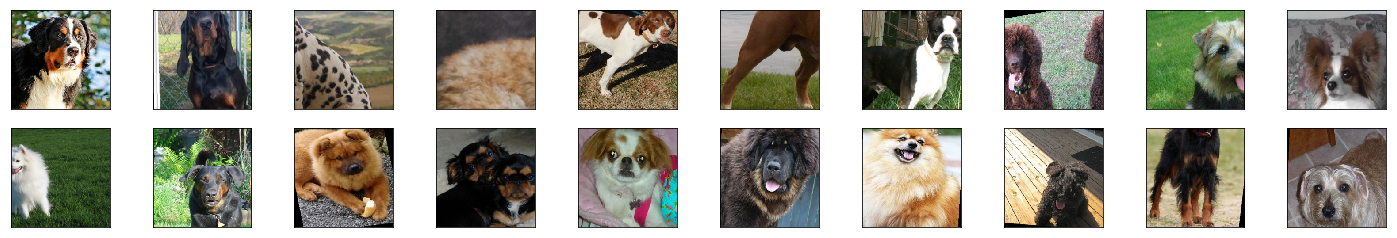

In [27]:
dataiter = iter(loaders_transfer['train'])
images, labels = dataiter.next()
# images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
#     ax.set_title(classes[labels[idx]])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [28]:
import torchvision.models as models
import torch.nn as nn

# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)

# printing out the model structure
# print(model_transfer)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
print('model attributes-', model_transfer.classifier[6].in_features)
print('classes-', len(classes))

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

final_layer = nn.Linear(model_transfer.classifier[6].in_features, len(classes))
model_transfer.classifier[6] = final_layer

print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

model attributes- 4096
classes- 133
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Steps used to decide final architecture were as follows-
- I choose vgg16 as my pre-trained model for transfer learning as it's architecture is easy and simple to use according to some online articles.
- As, the training dataset ahd approximately 6000 images, I considered it to be a small dataset. Also, vgg16 is trained on similar dataset of images. So, according to udacity learning, I choose to keep the feature maps weights constant to use it as a feature extractor.
- Changed the final fully-connected layer of vgg16 to match the output nodes with the number of classes.
- Used SGD as optimizer as it provides maximum decrease of traning loss, especially when compared to Adam.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [29]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [14]:
n_epochs = 15
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 3.457470 	Validation Loss: 1.261633
Validation loss decreased (inf --> 1.261633).  Saving model ...
Epoch: 2 	Training Loss: 1.634579 	Validation Loss: 0.629076
Validation loss decreased (1.261633 --> 0.629076).  Saving model ...
Epoch: 3 	Training Loss: 1.278480 	Validation Loss: 0.501733
Validation loss decreased (0.629076 --> 0.501733).  Saving model ...
Epoch: 4 	Training Loss: 1.117713 	Validation Loss: 0.465057
Validation loss decreased (0.501733 --> 0.465057).  Saving model ...
Epoch: 5 	Training Loss: 1.067195 	Validation Loss: 0.408532
Validation loss decreased (0.465057 --> 0.408532).  Saving model ...
Epoch: 6 	Training Loss: 1.000041 	Validation Loss: 0.408487
Validation loss decreased (0.408532 --> 0.408487).  Saving model ...
Epoch: 7 	Training Loss: 0.948371 	Validation Loss: 0.411973
Epoch: 8 	Training Loss: 0.928697 	Validation Loss: 0.386913
Validation loss decreased (0.408487 --> 0.386913).  Saving model ...
Epoch: 9 	Training Loss: 0.884992 

In [30]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.398300


Test Accuracy: 86% (724/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [32]:
import numpy as np
from glob import glob
from PIL import Image

data_transfer = {}

data_transfer['train'] = train_data
data_transfer['test'] = test_data
data_transfer['valid'] = validation_data

dog_files_test = np.array(glob("/data/dog_images/test/*/*"))

In [33]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    model_transfer.eval()
    img = Image.open(img_path)
    
    transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), 
                                                         (0.229, 0.224, 0.225))])

    img = transform(img).unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    output = model_transfer.forward(img)
    
    output = output.cpu()
    
    predicted_index = torch.argmax(output).item()
    
    print('Predicted index-', predicted_index)
    return class_names[predicted_index] # predicted class index

In [34]:
predict_breed_transfer(dog_files_test[200])

Predicted index- 28


'Border collie'

In [35]:
predict_breed_transfer(dog_files_test[600])

Predicted index- 116


'Pekingese'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
def face_detector(img_path):
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [37]:
def dog_detector(img_path):    
    prediction_index = VGG16_predict(img_path)
    
    return True if prediction_index in list(range(151, 269)) else False

In [2]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2      
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = Image.open(img_path)
    image_array = asarray(image)
    
    is_human = face_detector(img_path)
    is_dog = dog_detector(img_path)
    
    if is_dog:
        print('=>','Hi Dog! How are you?')
        plt.imshow(image_array)
        plt.show()
        
        dog_breed = predict_breed_transfer(img_path)
        print('Your family is ', dog_breed,'!',sep='')
        print()
    elif is_human:
        print('=>','You are a human!')
        plt.imshow(image_array)
        plt.show()
        
        similar_breed = predict_breed_transfer(img_path)       
        print('Hey Human! You look like a ', similar_breed,'!', sep='')
        print()
    else:
        print('=>','Oops! You are neither a human nor a dog!')
        plt.imshow(image_array)
        plt.show()
        print('Please provide a different image!')
        print()


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ An accuracy of 86% was obtained on test images. The ouptut is better than expected for test images.
- As for the newly uploaded images, 2 out of 3 dog images were predicted correctly. The "bull terrier" was predicted as "pointer".
- For human images, model is able to extract some features such as hair color and textures to resemble them to a dog breed.

Possible improvements are as follows-
- Increasing the training datasets for breeds having less images in datasets. For instance, bull terrier.
- Training set can be augumented better to provide better randomization than current.
- Depth of feature extractor can be increased to predicted much closer resemblance of dog breeds for human images.
- Also, we can use other techinques such as batch normalization or adding momentum to optimizer to increase the accuracy further.

=> You are a human!


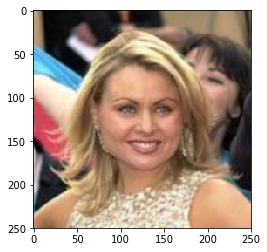

Predicted index- 48
Hey Human! You look like a Chinese crested!

=> You are a human!


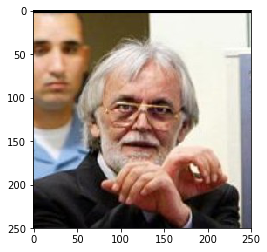

Predicted index- 1
Hey Human! You look like a Afghan hound!

=> You are a human!


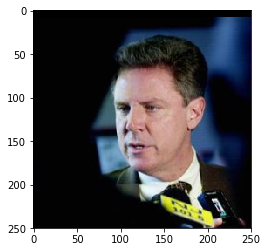

Predicted index- 13
Hey Human! You look like a Basenji!

=> You are a human!


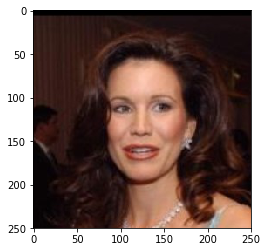

Predicted index- 8
Hey Human! You look like a American water spaniel!

=> You are a human!


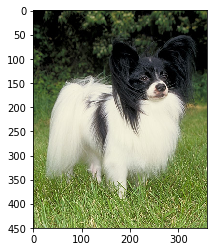

Predicted index- 114
Hey Human! You look like a Papillon!

=> Hi Dog! How are you?


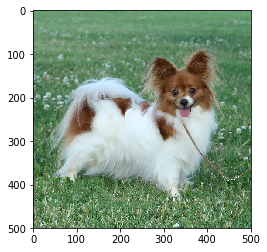

Predicted index- 114
Your family is Papillon!

=> Hi Dog! How are you?


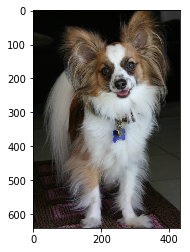

Predicted index- 114
Your family is Papillon!

=> Hi Dog! How are you?


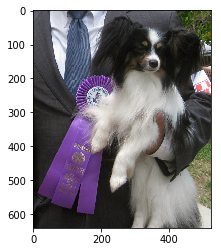

Predicted index- 114
Your family is Papillon!



In [39]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[100:104], dog_files[500:504])):
    run_app(file)

=> You are a human!


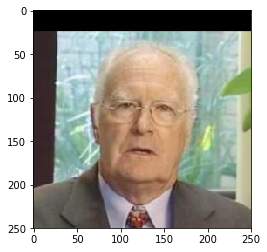

Predicted index- 13
Hey Human! You look like a Basenji!



In [40]:
run_app(human_files[1000])

In [41]:
files = np.array(glob("test_images/*"))

=> Image-1
=> You are a human!


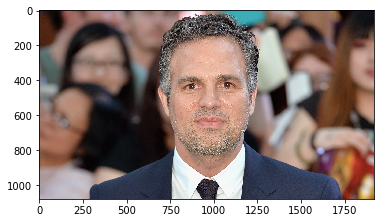

Predicted index- 47
Hey Human! You look like a Chihuahua!

=> Image-2
=> Oops! You are neihter a human nor a dog!


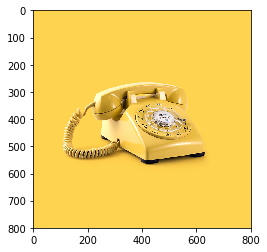

Please provide a different image!

=> Image-3
=> Hi Dog! How are you?


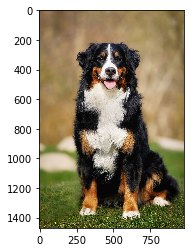

Predicted index- 22
Your family is Bernese mountain dog!

=> Image-4
=> You are a human!


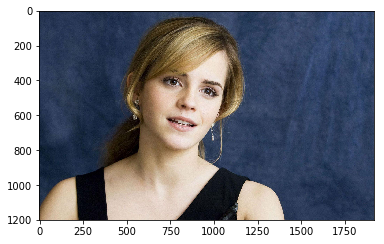

Predicted index- 1
Hey Human! You look like a Afghan hound!

=> Image-5
=> You are a human!


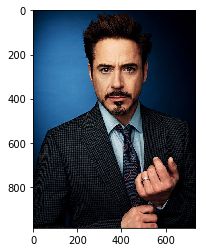

Predicted index- 47
Hey Human! You look like a Chihuahua!

=> Image-6
=> Hi Dog! How are you?


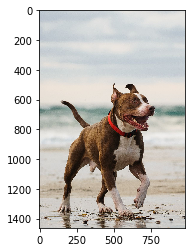

Predicted index- 121
Your family is Pointer!

=> Image-7
=> Hi Dog! How are you?


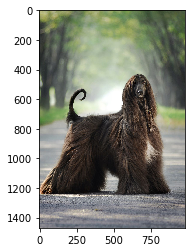

Predicted index- 1
Your family is Afghan hound!

=> Image-8
=> You are a human!


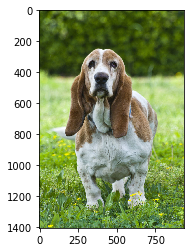

Predicted index- 14
Hey Human! You look like a Basset hound!



In [42]:
count = 0
for file in files:
    count += 1
    print('=>',' Image-',count, sep='')
    run_app(file)